In [2]:
from parsing import *
from NJ import *
import os
import time
import pandas as pd

#### Comparison tree in slide 4 vs the one we generate with the same tree: 

We can see some differences in the branch lengths in the BD clade.

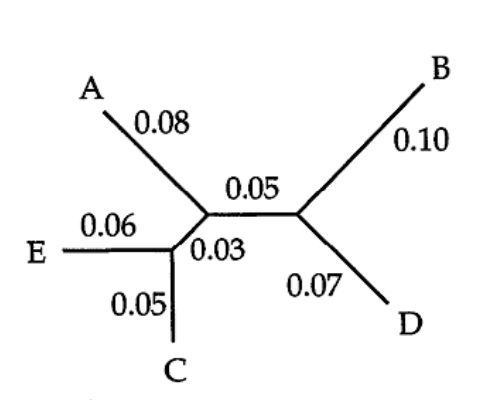

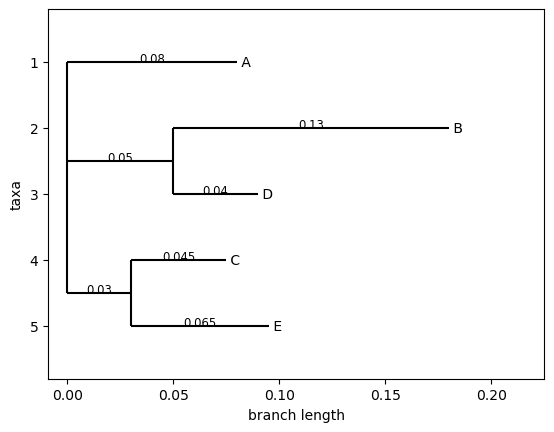

In [3]:
phy_file = "testdata/example_slide4.phy"
outputfile  = "output/slide4.nwk"
tree = NJ(phy_file,outputfile)
print_tree_branch(outputfile)

In [3]:
folder_path = "unique_distance_matrices/"

files = []
results = []
for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        file = folder_path + filename
        outputfile = 'output/unique_distances/'+filename[:-4] + '.nwk'
        files.append([file,outputfile,os.path.getsize(file)])
files.sort(key=lambda x: x[2])

In [4]:
results = []
for file,outputfile,_ in files[:5]:
    start_time = time.time()
    NJ(file,outputfile)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(file, outputfile,elapsed_time)
    results.append({'iteration': file, 'time': elapsed_time})
df = pd.DataFrame(results)
df

,iteration,time
0,unique_distance_matrices/89_Adeno_E3_CR1.phy,7.347792
1,unique_distance_matrices/214_Arena_glycoprot.phy,239.704620
2,unique_distance_matrices/304_A1_Propeptide.phy,964.513976
3,unique_distance_matrices/401_DDE.phy,4475.419575
4,unique_distance_matrices/494_Astro_capsid.phy,7221.924666


In [ ]:
df.to_excel('execution_times_first5.xlsx', index=False)